# 고객의 전체 모습을 파악하는 테크닉 10

#### 고객의 소리: 
스포츠 센터를 운영하고 있으나 최근 1년간 고객 수가 늘지 않고 있다.   
자주 이용하는 고객은 계속 오지만, 가끔오는 고객은 오지 않는 경우도 생긴다.   
제대로 데이터 분석을 한 적이 없어서 어떤 고객이 계속 이용하고 있는지 모른다.   
데이터 분석을 통해 뭔가를 알고 싶다.

#### 전제조건:  
1. 회원 구분은 3종류. 센터를 언제든지 사용할 수 있는 종일 회원, 낮에만 사용할 수 있는 주간 회원, 밤에만 사용할 수 있는 야간 회원.  
2. 일반적으로는 입회비가 있으나 비정기적으로 입회비 반액 할인, 입회비 무료 행사를 진행해서 신규 회원을 늘림.  
3. 탈퇴는 월말까지 신청하면 익월 말에 탈퇴.

#### 데이터 정보
|No.|파일 이름|개요|
|-|-|-|
|1|user_log.csv|센터의 이용 이력 데이터<br>기간은 2018년 4월~2019년 3월|
|2|customer_master.csv|2019년 3월 말 시점의 회원 데이터|
|3|class_master.csv|회원 구분 데이터(종일, 주간, 야간)|
|4|camplaign_master.csv|행사 구분 데이터(입회비 유무 등)|

### 테크닉021: 데이터를 읽어 들이고 확인하자

In [1]:
import pandas as pd
uselog = pd.read_csv('/Users/adam/Data_Analytics/Python/Field/03/use_log.csv')
print(len(uselog))
uselog.head()

197428


,log_id,customer_id,usedate
0,L00000049012330,AS009373,2018-04-01
1,L00000049012331,AS015315,2018-04-01
2,L00000049012332,AS040841,2018-04-01
3,L00000049012333,AS046594,2018-04-01
4,L00000049012334,AS073285,2018-04-01


In [2]:
customer = pd.read_csv('/Users/adam/Data_Analytics/Python/Field/03/customer_master.csv')
print(len(customer))
customer.head()

4192


,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted
0,OA832399,XXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0
1,PL270116,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0
2,OA974876,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0
3,HD024127,XXXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0
4,HD661448,XXXXX,C03,F,2015-05-01 00:00:00,NaN,CA1,0


In [3]:
class_master = pd.read_csv('/Users/adam/Data_Analytics/Python/Field/03/class_master.csv')
print(len(class_master))
class_master.head()

3


,class,class_name,price
0,C01,0_종일,10500
1,C02,1_주간,7500
2,C03,2_야간,6000


In [4]:
campaign_master = pd.read_csv('/Users/adam/Data_Analytics/Python/Field/03/campaign_master.csv')
print(len(campaign_master))
campaign_master.head()

3


,campaign_id,campaign_name
0,CA1,2_일반
1,CA2,0_입회비반액할인
2,CA3,1_입회비무료


### 테크닉022: 고객 데이터를 가공하자 

In [5]:
customer_join = pd.merge(customer, class_master, on='class', how='left')
customer_join = pd.merge(customer_join, campaign_master, on='campaign_id', how='left')
customer_join.head()

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name
0,OA832399,XXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0,0_종일,10500,2_일반
1,PL270116,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0,0_종일,10500,2_일반
2,OA974876,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0,0_종일,10500,2_일반
3,HD024127,XXXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0,0_종일,10500,2_일반
4,HD661448,XXXXX,C03,F,2015-05-01 00:00:00,NaN,CA1,0,2_야간,6000,2_일반


In [6]:
print(len(customer))
print(len(customer_join))

4192
4192


customer 파일을 기준으로, 조인키를 class로 하여 class_master 파일을 left 조인해서 customer_join 변수 생성.  
새로 생성한 customer_join 파일을 기준으로 조인키를 campaign_id로 하여 left 조인해서 customer_join 변수 수정.  
즉, 2번의 left join으로 3개의 테이블을 합쳐서 하나의 통합 데이터 테이블을 완성했다.  

#### 조인 후 결측치 유무 확인

In [7]:
customer_join.isnull().sum()

customer_id         0
name                0
class               0
gender              0
start_date          0
end_date         2842
campaign_id         0
is_deleted          0
class_name          0
price               0
campaign_name       0
dtype: int64

end_date의 결측치는 탈퇴 하지 않은 회원의 탈퇴일은 공백 처리를 했을 것으로 생각해볼 수 있다.

### 테크닉023: 고객 데이터를 집계하자

In [8]:
customer_join.groupby('class_name').count()['customer_id']

class_name
0_종일    2045
1_주간    1019
2_야간    1128
Name: customer_id, dtype: int64

회원권의 비율은 종일반이 거의 절반을 차지하고 있다.

In [9]:
customer_join.groupby('campaign_name').count()['customer_id']

campaign_name
0_입회비반액할인     650
1_입회비무료       492
2_일반         3050
Name: customer_id, dtype: int64

캠페인은 일반 입회가 가장 많다.  
이 수치를 백분율로 계산 하거나 분포 시각화를 하면 더 쉽게 이해 할 수 있을 것이다.

In [10]:
customer_join.groupby('gender').count()['customer_id']

gender
F    1983
M    2209
Name: customer_id, dtype: int64

성별은 남성이 여성보다 더 많다.

In [11]:
customer_join.groupby('is_deleted').count()['customer_id']

is_deleted
0    2842
1    1350
Name: customer_id, dtype: int64

2019년 3월 현재 가입된 회원은 2842명이고 탈퇴한 회원은 1350명 이다.

#### date_time 형 변환: 시험 삼아 2018년 4월 1일 이후부터 2019년 3월 31일까지인 가입 인원 집계 해본다.

In [12]:
customer_join['start_date'] = pd.to_datetime(customer_join['start_date'])
customer_start = customer_join.loc[customer_join['start_date'] > pd.to_datetime('20180401')]
print(len(customer_start))

1361


해당 기간 (2018년 4월 1일 ~ 2019년 3월 31일)의 가입 인원이 1361명인 것을 알 수 있다.

### 테크닉024: 최신 고객 데이터를 집계하자

#### 가장 최근 월(2019년 3월)의 고객 데이터 파악

In [13]:
customer_join['end_date'] = pd.to_datetime(customer_join['end_date'])
customer_newer = customer_join.loc[(customer_join['end_date'] >= pd.to_datetime('20190331')) | (customer_join['end_date'].isna())]
print(len(customer_newer))
customer_newer['end_date'].unique()

2953


array([                          'NaT', '2019-03-31T00:00:00.000000000'],
      dtype='datetime64[ns]')

NaT는 datetime형의 결측치를 의미한다.

#### 회원 구분, 캠페인 구분, 성별로 전체를 파악하기

In [14]:
customer_newer.groupby('class_name').count()['customer_id']

class_name
0_종일    1444
1_주간     696
2_야간     813
Name: customer_id, dtype: int64

In [15]:
customer_newer.groupby('campaign_name').count()['customer_id']

campaign_name
0_입회비반액할인     311
1_입회비무료       242
2_일반         2400
Name: customer_id, dtype: int64

In [16]:
customer_newer.groupby('gender').count()['customer_id']

gender
F    1400
M    1553
Name: customer_id, dtype: int64

전체를 집계 했을 때와 비교해서 비율에 큰 차이가 없다.  
이는 특정 회원 구분이나 성별이 탈퇴한 것이 아니라고 생각할 수 있다.  
켐페인 구분은 약간의 차이가 있는데, 일반 입회 회원의 비율이 늘어난 것으로 보아 캠페인이 회원 비율에 영향을 미쳤다고 추측할 수 있다.

### 테크닉025: 이용 이력 데이터를 집계하자

#### 시간적인 요소를 도입한다

In [17]:
uselog['usedate'] = pd.to_datetime(uselog['usedate'])
uselog['연월'] = uselog['usedate'].dt.strftime("%Y%m")
uselog_months = uselog.groupby(['연월','customer_id'], as_index=False).count()
uselog_months.rename(columns={'log_id':'count'}, inplace=True)
del uselog_months['usedate']
uselog_months.head()

,연월,customer_id,count
0,201804,AS002855,4
1,201804,AS009013,2
2,201804,AS009373,3
3,201804,AS015315,6
4,201804,AS015739,7


#### 고객별 평균값, 중앙값, 최댓값, 최솟값 집계

In [18]:
uselog_customer = uselog_months.groupby('customer_id').agg(['mean', 'median', 'max', 'min'])['count']
uselog_customer = uselog_customer.reset_index(drop=False)
uselog_customer.head()

,customer_id,mean,median,max,min
0,AS002855,4.500000,5.0,7,2
1,AS008805,4.000000,4.0,8,1
2,AS009013,2.000000,2.0,2,2
3,AS009373,5.083333,5.0,7,3
4,AS015233,7.545455,7.0,11,4


### 테크닉026: 이용 이력 데이터로부터 정기 이용 플래그를 작성하자

#### 고객마다 월/요일별 집계

In [19]:
uselog['weekday'] = uselog['usedate'].dt.weekday
uselog_weekday = uselog.groupby(['customer_id', '연월','weekday'],
                                as_index = False).count()[['customer_id', '연월', 'weekday', 'log_id']]
uselog_weekday.rename(columns={'log_id':'count'}, inplace=True)
uselog_weekday.head()

,customer_id,연월,weekday,count
0,AS002855,201804,5,4
1,AS002855,201805,2,1
2,AS002855,201805,5,4
3,AS002855,201806,5,5
4,AS002855,201807,1,1


#### 고객별 최댓값 계산, 최댓값이 4이상인 경우 플래그 지정

In [20]:
uselog_weekday = uselog_weekday.groupby('customer_id', as_index=False).max()[['customer_id', 'count']]
uselog_weekday['routine_flg'] = 0
uselog_weekday['routine_flg'] = uselog_weekday['routine_flg'].where(uselog_weekday['count'] < 4, 1)
uselog_weekday.head()

,customer_id,count,routine_flg
0,AS002855,5,1
1,AS008805,4,1
2,AS009013,2,0
3,AS009373,5,1
4,AS015233,5,1


### 테크닉027: 고객 데이터와 이용 이력 데이터를 결합하자

In [21]:
customer_join = pd.merge(customer_join, uselog_customer, on='customer_id', how='left')
customer_join = pd.merge(customer_join, uselog_weekday[['customer_id','routine_flg']], on='customer_id', how='left')
customer_join.head()

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name,mean,median,max,min,routine_flg
0,OA832399,XXXX,C01,F,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,4.833333,5.0,8,2,1
1,PL270116,XXXXX,C01,M,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,5.083333,5.0,7,3,1
2,OA974876,XXXXX,C01,M,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,4.583333,5.0,6,3,1
3,HD024127,XXXXX,C01,F,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,4.833333,4.5,7,2,1
4,HD661448,XXXXX,C03,F,2015-05-01,NaT,CA1,0,2_야간,6000,2_일반,3.916667,4.0,6,1,1


#### 데이터 결합 후 결측치 확인

In [22]:
customer_join.isnull().sum()

customer_id         0
name                0
class               0
gender              0
start_date          0
end_date         2842
campaign_id         0
is_deleted          0
class_name          0
price               0
campaign_name       0
mean                0
median              0
max                 0
min                 0
routine_flg         0
dtype: int64

end_date를 제외한 나머지 컬럼에 결측값이 없는 것으로 보아 오류 없이 결합 되었음을 확인 할 수 있다.

### 테크닉028: 회원 기간을 계산하자 

In [23]:
from dateutil.relativedelta import relativedelta
customer_join['calc_date'] = customer_join['end_date']
customer_join['calc_date'] = customer_join['calc_date'].fillna(pd.to_datetime('20190430'))
customer_join['membership_period'] = 0
for i in range(len(customer_join)):
    delta = relativedelta(customer_join['calc_date'].iloc[i], customer_join['start_date'].iloc[i])
    customer_join['membership_period'].iloc[i] = delta.years*12 + delta.months
customer_join.head()

/var/folders/7r/wgftjkfx18j59k9jdyw6892c0000gn/T/ipykernel_25920/2375658800.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customer_join['membership_period'].iloc[i] = delta.years*12 + delta.months


,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name,mean,median,max,min,routine_flg,calc_date,membership_period
0,OA832399,XXXX,C01,F,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,4.833333,5.0,8,2,1,2019-04-30,47
1,PL270116,XXXXX,C01,M,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,5.083333,5.0,7,3,1,2019-04-30,47
2,OA974876,XXXXX,C01,M,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,4.583333,5.0,6,3,1,2019-04-30,47
3,HD024127,XXXXX,C01,F,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,4.833333,4.5,7,2,1,2019-04-30,47
4,HD661448,XXXXX,C03,F,2015-05-01,NaT,CA1,0,2_야간,6000,2_일반,3.916667,4.0,6,1,1,2019-04-30,47


### 테크닉029: 고객 행동의 각종 통계량을 파악하자

In [24]:
customer_join[['mean', 'median', 'max', 'min']].describe()

,mean,median,max,min
count,4192.000000,4192.000000,4192.000000,4192.000000
mean,5.333127,5.250596,7.823950,3.041269
std,1.777533,1.874874,2.168959,1.951565
min,1.000000,1.000000,1.000000,1.000000
25%,4.250000,4.000000,7.000000,2.000000
50%,5.000000,5.000000,8.000000,3.000000
75%,6.416667,6.500000,9.000000,4.000000
max,12.000000,12.000000,14.000000,12.000000


#### routine_flg 집계

In [25]:
customer_join.groupby('routine_flg').count()['customer_id']

routine_flg
0     779
1    3413
Name: customer_id, dtype: int64

정기적으로 이용하는 회원의 수가 많다는 것을 알 수 있다.

#### 회원 기간의 분포 확인

(array([857., 774., 395., 368., 311., 331., 323., 237., 288., 308.]),
 array([ 1. ,  5.6, 10.2, 14.8, 19.4, 24. , 28.6, 33.2, 37.8, 42.4, 47. ]),
 <BarContainer object of 10 artists>)

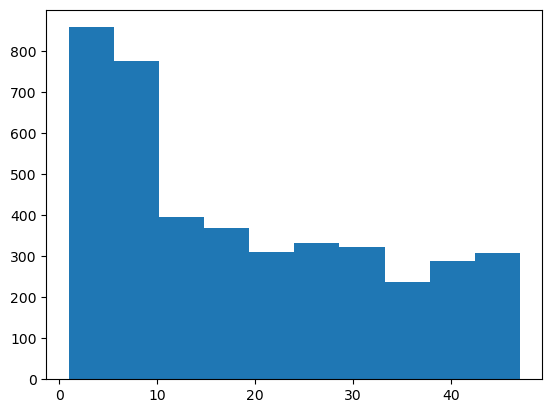

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.hist(customer_join['membership_period'])

회원 기간(x축)dl 10개월 이내인 고객이 많고, 10개월 이상의 고객 수는 거의 일정하다.  
이는 짧은 기간에 고객이 빠져나가는 업계라는 것을 알 수 있다.

### 테크닉030: 탈퇴 회원과 지속 회원의 차이를 파악하자

#### 탈퇴 회원과 지속 회원을 나눠서 describe로 비교

In [27]:
customer_end = customer_join.loc[customer_join['is_deleted'] == 1]
customer_end.describe()

,is_deleted,price,mean,median,max,min,routine_flg,membership_period
count,1350.0,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000
mean,1.0,8595.555556,3.865474,3.621852,6.461481,1.821481,0.456296,8.026667
std,0.0,1949.163652,1.246385,1.270847,2.584021,0.976361,0.498271,5.033692
min,1.0,6000.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
25%,1.0,6000.000000,3.000000,3.000000,4.000000,1.000000,0.000000,4.000000
50%,1.0,7500.000000,4.000000,4.000000,7.000000,2.000000,0.000000,7.000000
75%,1.0,10500.000000,4.666667,4.500000,8.000000,2.000000,1.000000,11.000000
max,1.0,10500.000000,9.000000,9.000000,13.000000,8.000000,1.000000,23.000000


In [28]:
customer_stay = customer_join.loc[customer_join['is_deleted'] == 0]
customer_stay.describe()

,is_deleted,price,mean,median,max,min,routine_flg,membership_period
count,2842.0,2842.000000,2842.000000,2842.000000,2842.000000,2842.000000,2842.000000,2842.000000
mean,0.0,8542.927516,6.030288,6.024279,8.471147,3.620690,0.984166,23.970443
std,0.0,1977.189779,1.553587,1.599765,1.571048,2.030488,0.124855,13.746761
min,0.0,6000.000000,3.166667,3.000000,5.000000,1.000000,0.000000,1.000000
25%,0.0,6000.000000,4.833333,5.000000,7.000000,2.000000,1.000000,12.000000
50%,0.0,7500.000000,5.583333,5.500000,8.000000,3.000000,1.000000,24.000000
75%,0.0,10500.000000,7.178030,7.000000,10.000000,5.000000,1.000000,35.000000
max,0.0,10500.000000,12.000000,12.000000,14.000000,12.000000,1.000000,47.000000


routine_flg의 평균값 차이가 크게 난다. 지속 회원은 0.98, 탈퇴 회원은 0.45이다.  
지속 회원은 정기적으로 이용하고 탈퇴 회원의 절반은 랜덤하게 이용하고 있다라고 생각할 수 있다.

탈퇴 회원과 지속 회원의 행동 데이터를 분석하면 차이점을 알 수 있으며, 기간을 줄이거나 회원의 재적 기간별 조사를 해보면
더 많은 것을 알 수 있을 것이다.

#### 가공한 데이터를 customer_join 파일 출력하기

In [29]:
customer_join.to_csv('customer_join.csv', index=False)

#### Key Point:  
조인할 때 키가 없거나 조인이 잘못되면 결측치가 발생하므로, 조인 후에는 반드시 결측치 유무를 확인한다.  
데이터 탐색 후 발생하는 여러 가지 가설이나 궁금한 점은 현장 사람들에게 질문함으로써 이해 할 수 있는 부분이 많다. 따라서, 적극적으로 의견을 청취한다.  
데이터를 바탕으로 컴퓨터가 추론하는 머신러닝은 어떤 데이터로 학습 시킬 것인가가 매우 중요하다.  
가능한 한 데이터를 잘 이해하고 특징이 될만한 변수를 파악해두는 것이 좋다.  
